In [1]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers

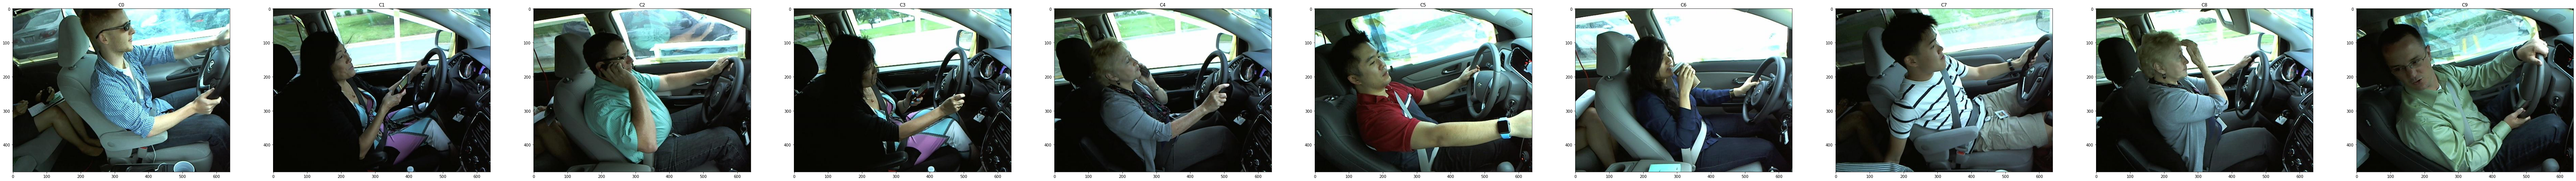

In [3]:
# Before Graying images
l, ax = plt.subplots(1, 10, figsize = (120,120)) # Create multiple subplots in a single figure
for i in range(10):
    labels = imread("D:/data-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")  # Read image from graphics file
    for j in range(1):
        img = labels[j]
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show()

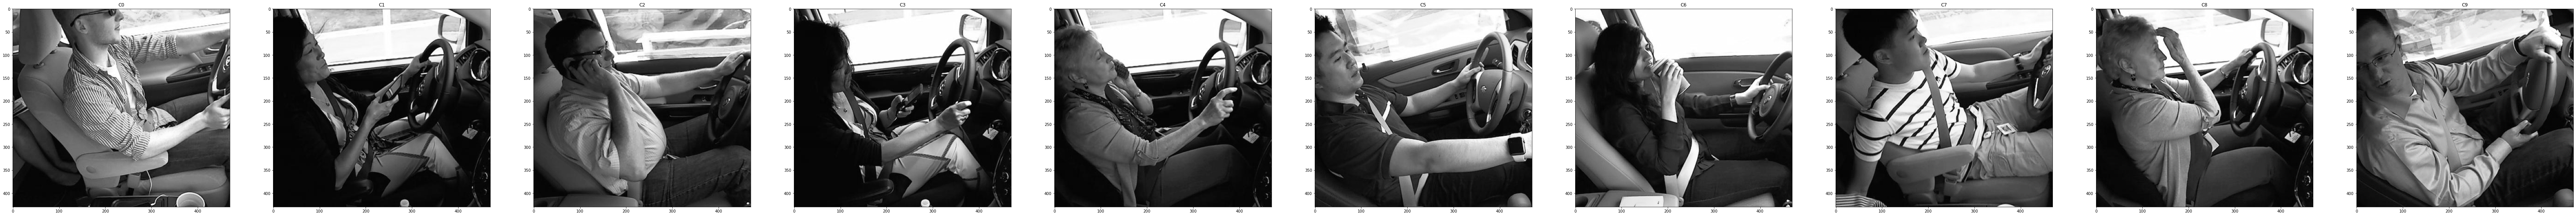

In [5]:
# After Editing
l, ax = plt.subplots(1, 10, figsize = (120,120)) # Create multiple subplots in a single figure
for i in range(10):
    labels = imread("D:/data-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")  # Read image from graphics file
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img) # Convert an image with RGB channels into an image with a single grayscale channel
        img = img[50:,120:-50]
        label = i
        ax[i].imshow(img, cmap='gray') 
        ax[i].set_title('C'+str(i)) # Set tittle on image
        plt.show()

In [7]:
train_image = []
image_label = []

for i in range(10):
    print('Location folder C',i)
    labels = imread("D:/data-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")  # Read image from graphics file
    for j in range(len(labels)):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224)) # Resize an image using Opencv
        label = i
        train_image.append([img,label])
        image_label.append(i)

Location folder C 0
Location folder C 1
Location folder C 2
Location folder C 3
Location folder C 4
Location folder C 5
Location folder C 6
Location folder C 7
Location folder C 8
Location folder C 9


In [8]:
# Randomly shuffling the images

import random
random.shuffle(train_image)

In [9]:
# Splitting the image and label to two different lists

X = []
Y = []
for features,labels in train_image:
    X.append(features)
    Y.append(labels)

print (len(X), len(Y))

22424 22424


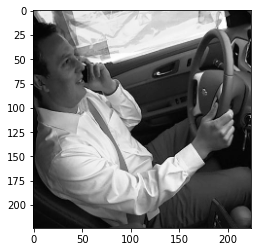

4


In [10]:
plt.imshow(X[5],cmap= 'gray')
plt.show()
print(Y[5])

In [11]:
# Converting images to nparray. Encoding the Y

X = np.array(X).reshape(-1,224,224,1)
Y = to_categorical(Y)

print (X.shape)

(22424, 224, 224, 1)


In [12]:
print(Y[5])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [14]:
# Designing the layers

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))


model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [15]:
# Fitting the model
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
561/561 [==============================] - 4590s 8s/step - loss: 0.2919 - accuracy: 0.9169 - val_loss: 0.2095 - val_accuracy: 0.9672
Epoch 2/3
561/561 [==============================] - 4291s 8s/step - loss: 0.0082 - accuracy: 0.9995 - val_loss: 0.0210 - val_accuracy: 0.9958
Epoch 3/3
561/561 [==============================] - 4551s 8s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 0.9962


Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9


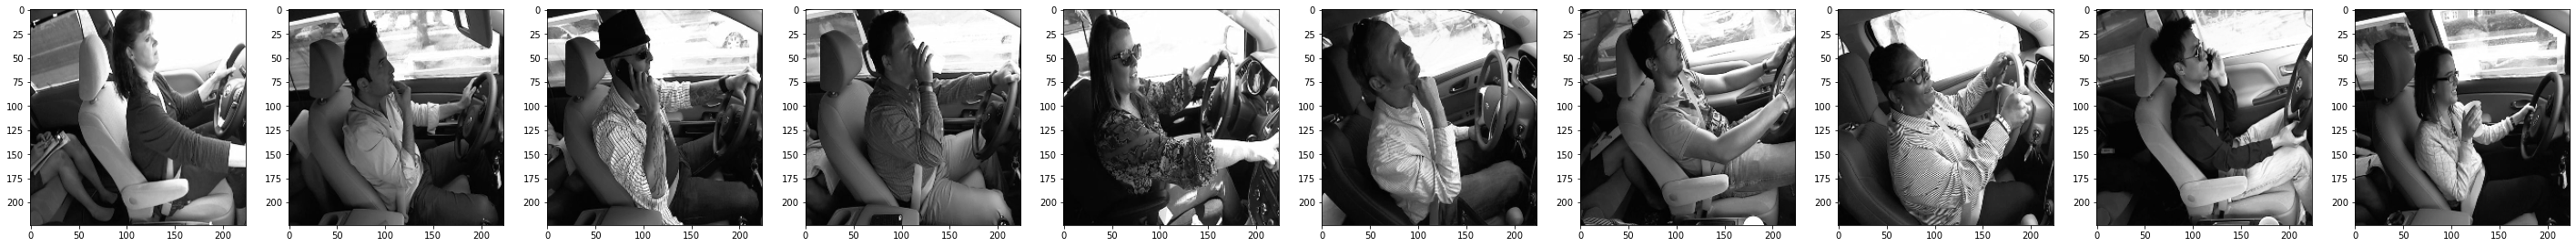

In [19]:
# Labels is the image array
test_image = []
i = 0
fig, ax = plt.subplots(1, 10, figsize = (50,50 ))

files = os.listdir('./state-farm-distracted-driver-detection/imgs/test')
nums = np.random.randint(low=1, high=len(files), size=10)
for i in range(10):
    print ('Image number:',i)
    img = cv2.imread('./state-farm-distracted-driver-detection/imgs/test/'+files[nums[i]])
    img = color.rgb2gray(img)
    #img = img[100:,300:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show

In [20]:
test = []

for img in test_image:
    test.append(img)

test = np.array(test).reshape(-1,224,224,1)
prediction = model.predict(test)

In [21]:
prediction[0]

array([4.02326608e-04, 1.04453648e-03, 1.06273445e-04, 1.67445934e-04,
       8.30436693e-05, 2.01186426e-02, 4.47179424e-03, 3.58932954e-03,
       1.66868549e-02, 9.53329802e-01], dtype=float32)

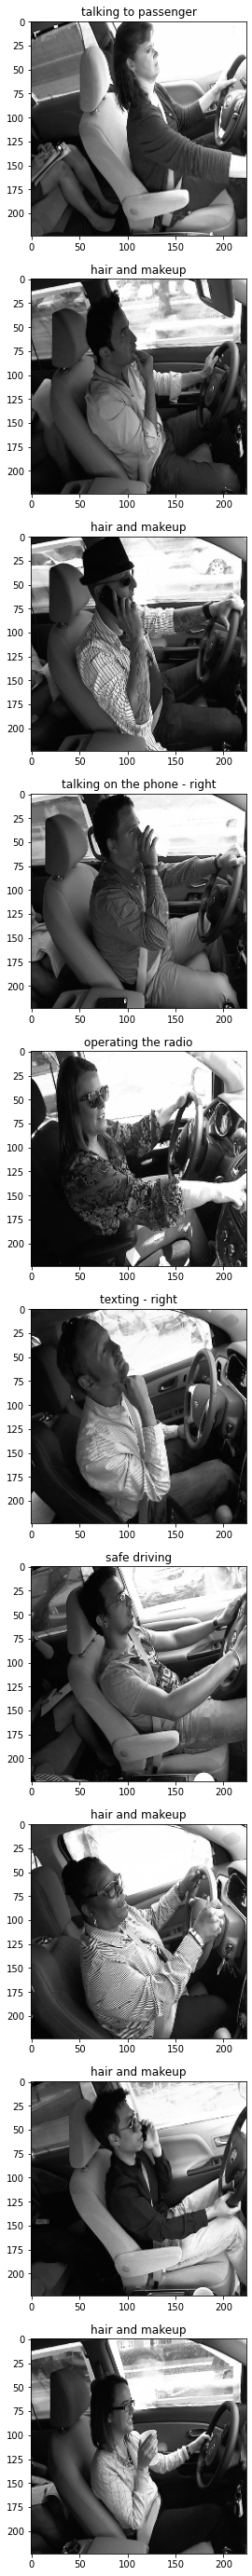

In [24]:
i = 0
fig, ax = plt.subplots(10, 1, figsize = (50,50 ))

for i in range(10):
    ax[i].imshow(test[i].squeeze(),cmap = 'gray')
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show()


In [23]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }